In [1]:
# load MET dataset

import numpy as np
import copy
import os
import sys
import math
from tqdm import tqdm
from scripts import dataset
from scripts import config


In [2]:
dataset_name = 'met'
#dataset_name = 'met-ub'

if dataset_name not in ['met', 'met-ub', 'lsp', 'mpii']:
    raise ValueError('Unknown dataset: {}'.format(dataset_name))

if dataset_name == 'mpii':
    TEST_CV_FILEPATH = os.path.join(config.MPII_DATASET_ROOT, 'test_joints.csv')
    IMG_PATH_PREFIX = os.path.join(config.MPII_DATASET_ROOT, 'images')
    symmetric_joints = "[[12, 13], [11, 14], [10, 15], [2, 3], [1, 4], [0, 5]]"
    ignore_label = -100500
elif dataset_name == 'lsp': # LSP dataset
    TEST_CV_FILEPATH = os.path.join(config.LSP_DATASET_ROOT, 'test_joints.csv')
    IMG_PATH_PREFIX = os.path.join(config.LSP_DATASET_ROOT, 'images')
    symmetric_joints = "[[8, 9], [7, 10], [6, 11], [2, 3], [1, 4], [0, 5]]"
    ignore_label = -1
elif dataset_name == 'met': # MET dataset
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'activity1.csv') # test only one image
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'activity.csv')    
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'activity_wo.csv')
    TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'activity_20180618.csv')
    # for debugging
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'writing46.csv')  # with valid joints info
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'writing46nv.csv')  # without valid joints info
    IMG_PATH_PREFIX = os.path.join(config.MET_DATASET_ROOT)
    symmetric_joints = "[[8, 9], [7, 10], [6, 11], [2, 3], [1, 4], [0, 5]]"
    ignore_label = -1
elif dataset_name == 'met-ub': # MET dataset with upper body 
    #TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'activity_wo_ub.csv')
    TEST_CV_FILEPATH = os.path.join(config.MET_DATASET_ROOT, 'activity-met_n10_ub.csv')
    IMG_PATH_PREFIX = os.path.join(config.MET_DATASET_ROOT)
    symmetric_joints = "[[8, 9], [7, 10], [6, 11], [2, 3], [1, 4], [0, 5]]"
    ignore_label = -1
else:
    pass
 
    
print(TEST_CV_FILEPATH)
print(IMG_PATH_PREFIX)

test_dataset = dataset.PoseDataset(
    TEST_CV_FILEPATH,
    IMG_PATH_PREFIX, 227,
    fliplr=False, rotate=False,
    shift=None,
    #bbox_extension_range=(1.0, 1.0),
    bbox_extension_range=(1.4, 1.4),
    coord_normalize=True,
    gcn=True,
    fname_index=0,
    #joint_index=1, joint_index_end=29,
    joint_index=13, joint_index_end=29,
    symmetric_joints=symmetric_joints,
    ignore_label=ignore_label,
    should_return_bbox=True,
    should_downscale_images=True,
    downscale_height=400
)

print("data ready")

15it [00:00, 123.93it/s]

/var/data/MET2/activity_20180618.csv
/var/data/MET2
Reading dataset from /var/data/MET2/activity_20180618.csv
Downscale images to the height 400px


54it [00:00, 74.99it/s] 

/var/data/MET2/image/office activities/walking about/46.jpg contains non-valid joints
[1 1 0 1 1 1 1 1]
/var/data/MET2/image/office activities/writing/11.bmp contains non-valid joints
[1 1 1 1 0 0 1 1]
/var/data/MET2/image/office activities/writing/17.bmp contains non-valid joints
[1 1 1 1 1 1 0 1]
/var/data/MET2/image/office activities/writing/19.bmp contains non-valid joints
[1 1 1 1 0 0 1 1]
/var/data/MET2/image/office activities/writing/24.jpeg contains non-valid joints
[1 1 1 1 1 0 1 1]
/var/data/MET2/image/office activities/writing/25.jpeg contains non-valid joints
[1 1 1 1 1 0 1 1]
/var/data/MET2/image/office activities/writing/27.jpeg contains non-valid joints
[1 1 1 0 1 1 1 1]
/var/data/MET2/image/office activities/writing/30.jpeg contains non-valid joints
[1 1 1 1 0 1 1 1]
/var/data/MET2/image/office activities/writing/35.jpeg contains non-valid joints
[1 1 1 1 1 1 1 0]
/var/data/MET2/image/office activities/writing/38.jpeg contains non-valid joints
[1 0 1 1 1 1 0 1]
/var/dat

136it [00:00, 161.03it/s]

/var/data/MET2/image/office activities/reading.seated/17.jpg contains non-valid joints
[1 1 1 1 1 0 1 1]
/var/data/MET2/image/office activities/reading.seated/23.png contains non-valid joints
[0 0 0 1 1 1 1 1]
/var/data/MET2/image/office activities/reading.seated/25.png contains non-valid joints
[1 1 1 1 0 0 1 1]


233it [00:01, 140.43it/s]

/var/data/MET2/image/office activities/typing/10.bmp contains non-valid joints
[1 0 0 1 0 1 1 1]
/var/data/MET2/image/office activities/typing/33.bmp contains non-valid joints
[1 0 1 1 0 1 1 1]


302it [00:01, 157.92it/s]

/var/data/MET2/image/office activities/lifting.packing/lifting/60.jpg contains non-valid joints
[0 1 1 0 0 1 1 1]


329it [00:02, 135.80it/s]/home/yyoo/src/deeppose/scripts/dataset.py:153: UserWarning: Skipping joint with incorrect joints coordinates. They are out of the image.
image: /var/data/MET2/image/office activities/lifting.packing/packing/41.png, joint: [522. 701.], im.shape: (328, 622)
  'image: {}, joint: {}, im.shape: {}'.format(img_path, joints[i_joint], image_shape[:2]))
412it [00:03, 134.40it/s]

/var/data/MET2/image/office activities/filing.seated/1.bmp contains non-valid joints
[1 1 1 1 0 1 1 1]
/var/data/MET2/image/office activities/filing.seated/10.bmp contains non-valid joints
[1 0 0 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.seated/12.bmp contains non-valid joints
[1 0 1 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.seated/13.bmp contains non-valid joints
[1 0 1 1 0 1 1 1]
/var/data/MET2/image/office activities/filing.seated/19.bmp contains non-valid joints
[1 1 1 1 1 0 1 1]
/var/data/MET2/image/office activities/filing.seated/2.bmp contains non-valid joints
[1 1 1 1 0 1 1 1]
/var/data/MET2/image/office activities/filing.seated/20.bmp contains non-valid joints
[1 1 0 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.seated/24.jpg contains non-valid joints
[1 1 1 1 0 1 1 1]
/var/data/MET2/image/office activities/filing.seated/27.jpg contains non-valid joints
[0 1 1 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.seated/29.jpg contai

474it [00:03, 143.25it/s]

/var/data/MET2/image/office activities/filing.seated/58.jpg contains non-valid joints
[1 1 1 1 1 1 0 1]
/var/data/MET2/image/office activities/filing.seated/6.bmp contains non-valid joints
[1 1 1 1 0 1 1 1]
/var/data/MET2/image/office activities/filing.stand/10.bmp contains non-valid joints
[0 0 1 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.stand/12.bmp contains non-valid joints
[1 1 1 1 0 1 1 1]
/var/data/MET2/image/office activities/filing.stand/13.bmp contains non-valid joints
[0 0 1 1 1 1 1 1]
/var/data/MET2/image/office activities/filing.stand/14.bmp contains non-valid joints
[1 1 1 1 0 1 1 1]
/var/data/MET2/image/office activities/filing.stand/16.bmp contains non-valid joints
[1 1 1 0 0 0 1 1]
/var/data/MET2/image/office activities/filing.stand/20.jpg contains non-valid joints
[1 1 1 1 0 0 1 1]
/var/data/MET2/image/office activities/filing.stand/21.jpg contains non-valid joints
[1 1 1 1 0 1 1 1]
/var/data/MET2/image/office activities/filing.stand/22.jpg contains non-

569it [00:03, 151.54it/s]

/var/data/MET2/image/miscellaneous occupational activity/cooking/53.PNG contains non-valid joints
[1 1 1 1 0 1 1 1]


624it [00:03, 157.42it/s]

/var/data/MET2/image/miscellaneous occupational activity/house cleaning/35.png contains non-valid joints
[1 1 1 1 1 0 1 1]
/var/data/MET2/image/miscellaneous occupational activity/house cleaning/38.jpg contains non-valid joints
[1 1 1 1 1 1 0 1]
/var/data/MET2/image/miscellaneous occupational activity/house cleaning/39.jpg contains non-valid joints
[0 1 1 1 1 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/house cleaning/52.jpg contains non-valid joints
[1 1 1 1 1 1 0 1]
/var/data/MET2/image/miscellaneous occupational activity/machine work.light/4.png contains non-valid joints
[1 1 1 1 1 1 1 0]
/var/data/MET2/image/miscellaneous occupational activity/machine work.light/6.jpg contains non-valid joints
[0 1 1 1 1 1 1 1]


687it [00:04, 159.11it/s]

/var/data/MET2/image/miscellaneous occupational activity/machine work.light/31.jpg contains non-valid joints
[1 1 1 1 0 1 1 1]
/var/data/MET2/image/miscellaneous occupational activity/machine work.light/40.jpg contains non-valid joints
[1 1 1 1 1 1 1 0]
/var/data/MET2/image/miscellaneous occupational activity/machine work.sawing/1.jpg contains non-valid joints
[1 1 1 1 1 1 0 0]


739it [00:04, 161.69it/s]

/var/data/MET2/image/miscellaneous occupational activity/machine work.sawing/5.jpg contains non-valid joints
[1 1 1 1 0 0 1 1]
/var/data/MET2/image/miscellaneous occupational activity/machine work.sawing/57.jpg contains non-valid joints
[1 1 1 1 1 1 1 0]
/var/data/MET2/image/miscellaneous occupational activity/machine work.sawing/55.jpg contains non-valid joints
[1 0 1 1 1 1 1 1]


763it [00:04, 162.86it/s]/home/yyoo/src/deeppose/scripts/dataset.py:153: UserWarning: Skipping joint with incorrect joints coordinates. They are out of the image.
image: /var/data/MET2/image/resting/seated.quiet/31.jpg, joint: [660.         175.83333333], im.shape: (400, 267)
  'image: {}, joint: {}, im.shape: {}'.format(img_path, joints[i_joint], image_shape[:2]))
836it [00:04, 170.52it/s]

/var/data/MET2/image/resting/reclining/7.png contains non-valid joints
[1 1 1 0 1 1 1 1]
/var/data/MET2/image/resting/seated.quiet/31.jpg contains non-valid joints
[0 0 1 1 1 1 1 1]
/var/data/MET2/image/resting/sleeping/10.png contains non-valid joints
[1 1 1 1 1 0 1 1]


959it [00:05, 190.15it/s]

/var/data/MET2/image/resting/sleeping/16.png contains non-valid joints
[1 1 1 1 1 0 1 1]
/var/data/MET2/image/resting/sleeping/24.jpg contains non-valid joints
[1 1 1 1 1 0 1 1]
/var/data/MET2/image/resting/sleeping/30.jpg contains non-valid joints
[1 1 0 1 1 1 1 1]
Joints shape: (8, 2)
data ready


## Let's first understand how to process one image

68 98


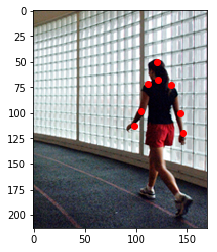

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

imageIdx = 0   # this image has only upper body
img=test_dataset.get_original_image(imageIdx)


image, joints, is_valid_joints, misc = test_dataset.get_example(imageIdx)
valid_joints = joints[is_valid_joints].reshape(-1,2)

#bbox=misc['orig_tightest_bbox']
bbox=misc['bbox']


# plot joints
plt.imshow(img[:,:,::-1])
# plot joints
offsetX = bbox[0]
offsetY = bbox[1]
W = bbox[2]#-bbox[0]
H = bbox[3]#-bbox[1]
print(W,H)
plt.plot((valid_joints[:,0]+0.5)*W+offsetX, (valid_joints[:,1]+0.5)*H+offsetY,'or')

In [4]:
# let's parse image name
id = misc['image_id'].split('/')
print(id)

activity = id[-2]
filename = id[-1]
filename_no, filename_ext = filename.split('.',1)
filename_no = int(filename_no)
filename_no = '{:02d}'.format(filename_no) # add leaning 0 for one digit numbers

print(activity, filename_no, filename_ext)



['image', 'office activities', 'walking about', '1.png']
walking about 01 png


In [5]:
# try to save
import os
folderName = 'joints/{}'.format(activity)
if not os.path.exists(folderName):
    os.makedirs(folderName)
plt.savefig(folderName+'/'+filename_no+'.'+filename_ext)

<Figure size 432x288 with 0 Axes>

## Let's repeat for all the images!

  0%|          | 0/957 [00:00<?, ?it/s]

68 98
walking about 01 png


  0%|          | 2/957 [00:00<00:48, 19.64it/s]

80 124
walking about 10 png
38 234
walking about 11 jpg
90 138
walking about 12 jpg


  0%|          | 4/957 [00:00<00:53, 17.96it/s]

55 151
walking about 13 jpg


  1%|          | 6/957 [00:00<00:53, 17.89it/s]

119 212
walking about 14 png
159 212
walking about 15 png


  1%|          | 8/957 [00:00<00:53, 17.82it/s]

61 151
walking about 16 png
95 103
walking about 17 jpg


  1%|          | 10/957 [00:00<00:53, 17.73it/s]

87 123
walking about 18 png
145 143
walking about 19 png


  1%|▏         | 12/957 [00:00<00:53, 17.71it/s]

118 182
walking about 02 png
89 180
walking about 20 jpg


  1%|▏         | 14/957 [00:00<00:53, 17.66it/s]

182 188
walking about 21 png
147 269
walking about 22 png


  2%|▏         | 16/957 [00:00<00:53, 17.63it/s]

94 232
walking about 23 png
106 286
walking about 24 png


  2%|▏         | 18/957 [00:01<00:53, 17.59it/s]

151 259
walking about 25 png
182 261
walking about 26 png
157 266
walking about 27 jpg


  2%|▏         | 20/957 [00:01<00:53, 17.45it/s]

118 254
walking about 28 png


  2%|▏         | 22/957 [00:01<00:53, 17.35it/s]

96 259
walking about 29 png
108 188
walking about 03 png
137 176
walking about 30 png


  3%|▎         | 26/957 [00:01<00:55, 16.87it/s]

185 241
walking about 31 png
79 246
walking about 32 png
122 225
walking about 33 png
188 204
walking about 34 png


  3%|▎         | 28/957 [00:01<00:55, 16.83it/s]

79 281
walking about 35 png
97 276
walking about 36 png


  3%|▎         | 32/957 [00:01<00:54, 16.91it/s]

95 258
walking about 37 jpg
112 248
walking about 38 jpg
163 272
walking about 39 jpg
169 265
walking about 04 png


  4%|▎         | 34/957 [00:02<00:54, 16.79it/s]

181 231
walking about 40 jpg
53 264
walking about 41 png


  4%|▍         | 38/957 [00:02<00:54, 16.84it/s]

106 192
walking about 42 png
158 275
walking about 43 jpg
91 192
walking about 44 jpg
143 140
walking about 45 png


  4%|▍         | 40/957 [00:02<00:54, 16.79it/s]

115 164
walking about 46 jpg
96 153
walking about 47 jpg


  4%|▍         | 42/957 [00:02<00:54, 16.84it/s]

69 268
walking about 48 png
104 182
walking about 49 png


  5%|▍         | 44/957 [00:02<00:54, 16.80it/s]

130 187
walking about 05 png
171 224
walking about 50 png


  5%|▍         | 46/957 [00:02<00:54, 16.77it/s]

89 240
walking about 51 png
164 223
walking about 52 jpg


  5%|▌         | 48/957 [00:02<00:54, 16.79it/s]

85 255
walking about 53 jpg
118 227
walking about 54 jpg


  5%|▌         | 50/957 [00:02<00:54, 16.77it/s]

144 256
walking about 55 jpg
145 261
walking about 56 png


  5%|▌         | 52/957 [00:03<00:54, 16.72it/s]

183 219
walking about 57 png
132 255
walking about 58 png


  6%|▌         | 54/957 [00:03<00:53, 16.73it/s]

57 191
walking about 59 jpg
158 236
walking about 06 png


  6%|▌         | 56/957 [00:03<00:54, 16.68it/s]

76 164
walking about 60 jpg
111 111
walking about 07 png


  6%|▌         | 58/957 [00:03<00:54, 16.65it/s]

129 203
walking about 08 png
18 115
walking about 09 png


  6%|▋         | 60/957 [00:03<00:53, 16.63it/s]

166 124
writing 01 bmp
233 157
writing 10 bmp


  6%|▋         | 62/957 [00:03<00:53, 16.61it/s]

102 192
writing 11 bmp
175 171
writing 12 jpeg


  7%|▋         | 64/957 [00:03<00:53, 16.54it/s]

94 150
writing 13 jpeg
112 171
writing 14 bmp


  7%|▋         | 66/957 [00:03<00:53, 16.51it/s]

290 145
writing 14 jpeg
200 131
writing 15 bmp


  7%|▋         | 68/957 [00:04<00:53, 16.47it/s]

192 158
writing 16 bmp
196 138
writing 17 bmp


  7%|▋         | 70/957 [00:04<00:54, 16.42it/s]

139 117
writing 18 bmp
228 127
writing 19 bmp


  8%|▊         | 72/957 [00:04<00:53, 16.40it/s]

208 178
writing 02 jpeg
174 183
writing 20 jpeg


  8%|▊         | 74/957 [00:04<00:54, 16.35it/s]

231 186
writing 21 jpeg
240 194
writing 22 jpeg


  8%|▊         | 76/957 [00:04<00:53, 16.32it/s]

137 170
writing 23 jpeg
207 183
writing 24 jpeg


  8%|▊         | 78/957 [00:04<00:54, 16.27it/s]

223 183
writing 25 jpeg


  8%|▊         | 80/957 [00:04<00:54, 16.08it/s]

81 87
writing 26 jpeg
166 179
writing 27 jpeg
185 125
writing 28 jpeg


  9%|▊         | 82/957 [00:05<00:55, 15.83it/s]

213 98
writing 29 jpeg
321 223
writing 03 bmp


  9%|▉         | 84/957 [00:05<00:55, 15.78it/s]

183 270
writing 30 jpeg
207 126
writing 31 jpeg


  9%|▉         | 86/957 [00:05<00:55, 15.79it/s]

216 166
writing 32 jpeg
132 182
writing 33 jpeg


  9%|▉         | 88/957 [00:05<00:55, 15.76it/s]

275 183
writing 34 jpeg
275 131
writing 35 jpeg


  9%|▉         | 90/957 [00:05<00:55, 15.74it/s]

123 196
writing 36 jpeg
217 183
writing 37 jpeg


 10%|▉         | 92/957 [00:05<00:54, 15.73it/s]

166 154
writing 38 jpeg
161 183
writing 39 jpeg


 10%|▉         | 94/957 [00:05<00:54, 15.71it/s]

513 243
writing 04 bmp


 10%|█         | 96/957 [00:06<00:54, 15.68it/s]

158 153
writing 40 jpeg
186 154
writing 41 jpeg
130 122
writing 42 jpeg


 10%|█         | 100/957 [00:06<00:54, 15.67it/s]

161 164
writing 43 jpeg
178 182
writing 44 jpeg
140 110
writing 45 jpeg
181 180
writing 46 jpeg


 11%|█         | 104/957 [00:06<00:54, 15.68it/s]

178 143
writing 47 jpeg
97 112
writing 48 jpeg
215 185
writing 49 jpeg
392 337
writing 05 jpg


 11%|█▏        | 108/957 [00:06<00:54, 15.65it/s]

164 191
writing 50 jpeg
126 146
writing 51 jpeg
299 260
writing 52 jpg


 12%|█▏        | 112/957 [00:07<00:54, 15.58it/s]

158 157
writing 53 jpeg
174 156
writing 54 jpeg
175 183
writing 55 jpeg
199 171
writing 56 jpeg


 12%|█▏        | 116/957 [00:07<00:54, 15.57it/s]

211 207
writing 57 jpeg
154 166
writing 58 jpeg
206 168
writing 59 jpeg


 12%|█▏        | 118/957 [00:07<00:53, 15.54it/s]

485 400
writing 06 jpg
130 175
writing 60 jpeg
158 140
writing 07 bmp
442 390
writing 08 bmp


 13%|█▎        | 122/957 [00:07<00:53, 15.47it/s]

448 400
reading.seated 01 bmp
118 172
reading.seated 10 bmp
188 137
reading.seated 11 bmp


 13%|█▎        | 126/957 [00:08<00:53, 15.50it/s]

237 164
reading.seated 12 bmp
111 140
reading.seated 13 bmp
112 83
reading.seated 14 bmp
122 91
reading.seated 15 bmp


 14%|█▎        | 130/957 [00:08<00:53, 15.50it/s]

115 129
reading.seated 16 bmp
349 314
reading.seated 17 jpg
130 153
reading.seated 18 bmp
77 87
reading.seated 19 bmp


 14%|█▍        | 134/957 [00:08<00:53, 15.49it/s]

343 382
reading.seated 02 bmp
166 158
reading.seated 20 bmp
228 243
reading.seated 21 jpg


 14%|█▍        | 136/957 [00:08<00:53, 15.39it/s]

337 370
reading.seated 22 jpg
105 125
reading.seated 23 png
254 273
reading.seated 24 png


 15%|█▍        | 140/957 [00:09<00:53, 15.37it/s]

141 235
reading.seated 25 png
469 400
reading.seated 26 png
145 229
reading.seated 27 png


 15%|█▍        | 142/957 [00:09<00:53, 15.36it/s]

238 333
reading.seated 28 jpg
189 210
reading.seated 29 png
208 143
reading.seated 03 bmp


 15%|█▌        | 146/957 [00:09<00:52, 15.31it/s]

165 186
reading.seated 30 jpg
160 176
reading.seated 31 jpg
162 233
reading.seated 32 jpg


 15%|█▌        | 148/957 [00:09<00:52, 15.27it/s]

154 171
reading.seated 33 jpg
195 232
reading.seated 34 jpg
215 291
reading.seated 35 png


 16%|█▌        | 152/957 [00:09<00:52, 15.21it/s]

549 400
reading.seated 36 jpg
281 274
reading.seated 37 jpg
206 242
reading.seated 38 jpg


 16%|█▌        | 154/957 [00:10<00:52, 15.18it/s]

231 336
reading.seated 39 jpg
368 317
reading.seated 04 jpg
197 214
reading.seated 40 jpg


 17%|█▋        | 158/957 [00:10<00:52, 15.11it/s]

240 394
reading.seated 41 jpg
367 400
reading.seated 42 jpg
81 179
reading.seated 43 jpg


 17%|█▋        | 160/957 [00:10<00:52, 15.07it/s]

202 332
reading.seated 44 jpg
222 139
reading.seated 45 png
143 212
reading.seated 46 jpg


 17%|█▋        | 162/957 [00:10<00:52, 15.02it/s]

147 222
reading.seated 47 png
216 300
reading.seated 48 jpg
318 277
reading.seated 49 jpg


 17%|█▋        | 166/957 [00:11<00:52, 15.00it/s]

108 112
reading.seated 05 bmp
355 270
reading.seated 50 jpg
286 294
reading.seated 51 jpg
207 192
reading.seated 52 jpg


 18%|█▊        | 170/957 [00:11<00:52, 14.97it/s]

152 215
reading.seated 53 jpg
228 283
reading.seated 54 jpg
106 135
reading.seated 55 jpg


 18%|█▊        | 174/957 [00:11<00:52, 14.93it/s]

82 88
reading.seated 56 jpg
185 151
reading.seated 57 jpg
394 204
reading.seated 58 png


 18%|█▊        | 176/957 [00:11<00:52, 14.94it/s]

227 305
reading.seated 59 jpg
77 94
reading.seated 06 bmp
445 300
reading.seated 60 jpg
96 100
reading.seated 07 bmp


 19%|█▉        | 180/957 [00:12<00:51, 14.94it/s]

361 400
reading.seated 08 jpg
111 115
reading.seated 09 bmp
315 382
typing 01 bmp


 19%|█▉        | 184/957 [00:12<00:51, 14.90it/s]

178 400
typing 10 bmp
139 164
typing 11 bmp
168 173
typing 12 bmp


 19%|█▉        | 186/957 [00:12<00:51, 14.92it/s]

133 141
typing 13 bmp
129 123
typing 14 bmp
154 145
typing 15 bmp
130 136
typing 16 bmp


 20%|█▉        | 190/957 [00:12<00:51, 14.88it/s]

117 104
typing 17 bmp
101 135
typing 18 bmp
136 140
typing 19 bmp


 20%|██        | 194/957 [00:13<00:51, 14.85it/s]

374 389
typing 02 bmp
115 138
typing 20 bmp
317 400
typing 21 bmp


 20%|██        | 196/957 [00:13<00:51, 14.83it/s]

273 389
typing 22 bmp
376 389
typing 23 bmp
376 400
typing 24 bmp


 21%|██        | 198/957 [00:13<00:51, 14.79it/s]

419 400
typing 25 bmp
318 400
typing 26 bmp
297 240
typing 27 bmp


 21%|██        | 202/957 [00:13<00:51, 14.74it/s]

189 263
typing 28 bmp
335 400
typing 29 bmp
226 246
typing 03 bmp


 21%|██▏       | 204/957 [00:13<00:51, 14.72it/s]

355 400
typing 30 bmp
301 282
typing 31 bmp
181 275
typing 32 bmp


 22%|██▏       | 208/957 [00:14<00:51, 14.65it/s]

311 393
typing 33 bmp
328 315
typing 34 bmp
517 400
typing 35 bmp


 22%|██▏       | 212/957 [00:14<00:50, 14.64it/s]

190 355
typing 36 bmp
255 282
typing 37 bmp
175 208
typing 38 bmp


 22%|██▏       | 214/957 [00:14<00:50, 14.63it/s]

484 400
typing 39 bmp
388 361
typing 04 bmp
302 373
typing 40 bmp


 23%|██▎       | 218/957 [00:14<00:50, 14.59it/s]

273 280
typing 41 bmp
349 342
typing 42 bmp
151 207
typing 43 bmp


 23%|██▎       | 220/957 [00:15<00:50, 14.57it/s]

321 379
typing 44 bmp
229 201
typing 45 bmp
166 186
typing 46 bmp


 23%|██▎       | 224/957 [00:15<00:50, 14.56it/s]

207 202
typing 47 bmp
394 397
typing 48 bmp
466 400
typing 49 bmp


 24%|██▎       | 226/957 [00:15<00:50, 14.55it/s]

166 144
typing 05 bmp
366 375
typing 50 bmp
518 376
typing 51 bmp


 24%|██▍       | 228/957 [00:15<00:50, 14.49it/s]

258 263
typing 52 bmp
295 367
typing 53 bmp


 24%|██▍       | 230/957 [00:15<00:50, 14.44it/s]

408 400
typing 54 bmp
329 384
typing 55 bmp
139 234
typing 56 bmp


 24%|██▍       | 234/957 [00:16<00:50, 14.40it/s]

384 358
typing 57 bmp
368 400
typing 58 bmp
480 400
typing 59 bmp


 25%|██▍       | 236/957 [00:16<00:50, 14.36it/s]

76 143
typing 06 bmp
405 359
typing 60 bmp


 25%|██▌       | 240/957 [00:16<00:50, 14.32it/s]

223 315
typing 07 bmp
70 89
typing 08 bmp
102 160
typing 09 bmp
288 291
lifting 01 png


 25%|██▌       | 244/957 [00:17<00:49, 14.33it/s]

398 206
lifting 10 jpg
96 150
lifting 11 jpg
52 171
lifting 12 jpg
181 223
lifting 13 jpg


 26%|██▌       | 248/957 [00:17<00:49, 14.35it/s]

230 222
lifting 14 jpg
55 143
lifting 15 jpg
103 137
lifting 16 jpg
79 229
lifting 17 png


 26%|██▋       | 252/957 [00:17<00:49, 14.34it/s]

112 273
lifting 18 png
137 197
lifting 19 png
123 158
lifting 02 png
203 101
lifting 20 png


 27%|██▋       | 254/957 [00:17<00:49, 14.30it/s]

61 152
lifting 21 jpg
60 175
lifting 44 jpg
53 196
lifting 23 jpg


 27%|██▋       | 258/957 [00:18<00:48, 14.28it/s]

69 152
lifting 24 png
81 290
lifting 25 jpg
238 184
lifting 26 jpg


 27%|██▋       | 262/957 [00:18<00:48, 14.27it/s]

255 317
lifting 27 jpg
152 177
lifting 28 jpg
245 257
lifting 29 png


 28%|██▊       | 264/957 [00:18<00:48, 14.28it/s]

40 117
lifting 03 png
310 398
lifting 30 jpg
211 210
lifting 31 jpg
115 275
lifting 32 png


 28%|██▊       | 268/957 [00:18<00:48, 14.31it/s]

187 243
lifting 33 jpg
148 222
lifting 34 jpg
195 322
lifting 35 jpg


 28%|██▊       | 272/957 [00:18<00:47, 14.32it/s]

48 255
lifting 36 jpg
80 76
lifting 37 png
136 256
lifting 38 jpg
193 192
lifting 39 jpg


 29%|██▉       | 276/957 [00:19<00:47, 14.33it/s]

59 119
lifting 04 png
187 220
lifting 40 jpg
133 143
lifting 41 jpg


 29%|██▉       | 278/957 [00:19<00:47, 14.28it/s]

199 207
lifting 31 jpg
185 188
lifting 43 jpg
60 175
lifting 44 jpg


 29%|██▉       | 282/957 [00:19<00:47, 14.21it/s]

84 192
lifting 45 jpg
109 164
lifting 46 jpg
52 118
lifting 47 png


 30%|██▉       | 284/957 [00:19<00:47, 14.22it/s]

97 103
lifting 48 jpg
108 76
lifting 49 png
275 351
lifting 05 png


 30%|███       | 288/957 [00:20<00:47, 14.23it/s]

84 96
lifting 50 png
75 115
lifting 51 jpg
82 151
lifting 52 jpg
84 244
lifting 53 png


 31%|███       | 292/957 [00:20<00:46, 14.23it/s]

102 304
lifting 54 jpg
151 179
lifting 55 jpg
150 271
lifting 56 jpg


 31%|███       | 294/957 [00:20<00:46, 14.24it/s]

218 197
lifting 57 png
153 132
lifting 58 jpg
283 307
lifting 59 jpg
175 237
lifting 06 png


 31%|███       | 298/957 [00:20<00:46, 14.25it/s]

419 316
lifting 60 jpg
155 73
lifting 07 jpg
91 108
lifting 08 jpg
77 130
lifting 09 jpg


 32%|███▏      | 302/957 [00:21<00:45, 14.26it/s]

193 345
packing 01 png
325 194
packing 10 png
223 313
packing 11 png


 32%|███▏      | 304/957 [00:21<00:45, 14.25it/s]

159 207
packing 12 png
139 243
packing 13 png
192 212
packing 14 png


 32%|███▏      | 308/957 [00:21<00:45, 14.23it/s]

271 224
packing 15 png
493 400
packing 16 png
55 141
packing 17 png


 33%|███▎      | 312/957 [00:21<00:45, 14.21it/s]

92 188
packing 18 png
207 250
packing 19 png
118 133
packing 02 jpg


 33%|███▎      | 314/957 [00:22<00:45, 14.20it/s]

235 400
packing 20 png
202 360
packing 21 png
268 341
packing 22 png


 33%|███▎      | 318/957 [00:22<00:45, 14.19it/s]

219 255
packing 23 png
145 270
packing 24 png
268 205
packing 25 png


 33%|███▎      | 320/957 [00:22<00:44, 14.17it/s]

382 378
packing 26 png
277 400
packing 27 png
151 346
packing 28 png


 34%|███▍      | 324/957 [00:22<00:44, 14.15it/s]

171 394
packing 29 png
82 89
packing 03 jpg
276 298
packing 30 png


 34%|███▍      | 326/957 [00:23<00:44, 14.14it/s]

180 313
packing 31 png
234 292
packing 32 png
441 385
packing 33 png


 34%|███▍      | 328/957 [00:23<00:44, 14.13it/s]

130 112
packing 34 png
370 400
packing 35 png
340 395
packing 36 png


 35%|███▍      | 332/957 [00:23<00:44, 14.08it/s]

205 272
packing 37 png
186 294
packing 38 png
179 399
packing 39 png


 35%|███▍      | 334/957 [00:23<00:44, 14.08it/s]

105 189
packing 04 png
278 362
packing 40 png
81 160
packing 43 png


 35%|███▌      | 338/957 [00:24<00:44, 14.06it/s]

142 274
packing 44 png
230 271
packing 45 png
306 342
packing 46 png


 36%|███▌      | 342/957 [00:24<00:43, 14.05it/s]

323 375
packing 47 png
286 293
packing 48 png
315 299
packing 49 png


 36%|███▌      | 344/957 [00:24<00:43, 14.01it/s]

117 152
packing 05 png
395 400
packing 50 png


 36%|███▌      | 346/957 [00:24<00:43, 13.99it/s]

191 400
packing 51 png
142 283
packing 52 png
263 200
packing 53 png


 37%|███▋      | 350/957 [00:25<00:43, 13.98it/s]

172 225
packing 54 png
309 367
packing 55 png
153 165
packing 56 png


 37%|███▋      | 352/957 [00:25<00:43, 13.98it/s]

156 181
packing 57 png
378 400
packing 58 png
326 362
packing 59 png


 37%|███▋      | 356/957 [00:25<00:43, 13.97it/s]

133 186
packing 06 png
347 251
packing 60 png
227 266
packing 07 png


 37%|███▋      | 358/957 [00:25<00:42, 13.95it/s]

188 278
packing 08 png
213 319
packing 09 png
68 124
filing.seated 01 bmp


 38%|███▊      | 360/957 [00:25<00:42, 13.96it/s]

20 56
filing.seated 10 bmp
116 144
filing.seated 11 bmp
49 102
filing.seated 12 bmp


 38%|███▊      | 364/957 [00:26<00:42, 13.93it/s]

63 78
filing.seated 13 bmp
61 97
filing.seated 14 bmp
133 184
filing.seated 15 bmp
68 115
filing.seated 16 bmp


 38%|███▊      | 368/957 [00:26<00:42, 13.94it/s]

87 83
filing.seated 17 bmp
42 52
filing.seated 18 bmp
55 60
filing.seated 19 bmp
41 81
filing.seated 02 bmp


 39%|███▉      | 372/957 [00:26<00:41, 13.95it/s]

111 76
filing.seated 20 bmp
159 186
filing.seated 21 jpg
357 400
filing.seated 22 jpg


 39%|███▉      | 376/957 [00:26<00:41, 13.94it/s]

115 194
filing.seated 23 jpg
84 199
filing.seated 24 jpg
263 379
filing.seated 25 jpg


 39%|███▉      | 378/957 [00:27<00:41, 13.94it/s]

304 321
filing.seated 26 jpg
305 400
filing.seated 27 jpg
161 185
filing.seated 28 jpg


 40%|███▉      | 382/957 [00:27<00:41, 13.93it/s]

355 210
filing.seated 29 jpg
84 123
filing.seated 03 bmp
137 182
filing.seated 30 jpg


 40%|████      | 384/957 [00:27<00:41, 13.93it/s]

190 177
filing.seated 31 jpg
171 91
filing.seated 33 jpg
255 326
filing.seated 34 jpg


 41%|████      | 388/957 [00:27<00:40, 13.94it/s]

140 232
filing.seated 35 jpg
154 156
filing.seated 36 jpg
157 154
filing.seated 36 jpg
272 262
filing.seated 37 jpg


 41%|████      | 392/957 [00:28<00:40, 13.94it/s]

241 274
filing.seated 38 jpg
87 113
filing.seated 39 jpg
123 115
filing.seated 04 bmp


 41%|████      | 394/957 [00:28<00:40, 13.94it/s]

150 201
filing.seated 40 jpg
271 400
filing.seated 41 jpg
160 167
filing.seated 42 jpg


 42%|████▏     | 398/957 [00:28<00:40, 13.95it/s]

130 183
filing.seated 43 jpg
181 168
filing.seated 44 jpg
48 67
filing.seated 45 jpg


 42%|████▏     | 400/957 [00:28<00:39, 13.94it/s]

118 117
filing.seated 46 jpg
55 83
filing.seated 47 jpg
74 194
filing.seated 48 jpg


 42%|████▏     | 404/957 [00:28<00:39, 13.95it/s]

96 103
filing.seated 49 jpg
91 68
filing.seated 05 bmp
94 81
filing.seated 50 jpg


 42%|████▏     | 406/957 [00:29<00:39, 13.95it/s]

81 125
filing.seated 51 jpg
329 327
filing.seated 52 jpg
276 349
filing.seated 53 jpg


 43%|████▎     | 408/957 [00:29<00:39, 13.95it/s]

131 112
filing.seated 54 jpg
101 151
filing.seated 55 jpg
384 272
filing.seated 56 jpg


 43%|████▎     | 412/957 [00:29<00:39, 13.92it/s]

176 345
filing.seated 57 jpg
340 349
filing.seated 58 jpg
383 338
filing.seated 59 jpg


 43%|████▎     | 414/957 [00:29<00:39, 13.91it/s]

46 52
filing.seated 06 bmp
98 124
filing.seated 60 jpg
42 67
filing.seated 07 bmp


 44%|████▎     | 418/957 [00:30<00:38, 13.88it/s]

76 95
filing.seated 08 bmp
26 66
filing.seated 09 bmp
109 138
filing.stand 01 bmp


 44%|████▍     | 420/957 [00:30<00:38, 13.86it/s]

48 67
filing.stand 10 bmp
67 93
filing.stand 11 bmp
49 49
filing.stand 12 bmp


 44%|████▍     | 424/957 [00:30<00:38, 13.86it/s]

38 61
filing.stand 13 bmp
27 56
filing.stand 14 bmp
47 73
filing.stand 15 bmp
89 80
filing.stand 16 bmp


 45%|████▍     | 428/957 [00:30<00:38, 13.86it/s]

60 95
filing.stand 17 bmp
41 73
filing.stand 18 bmp
46 47
filing.stand 19 bmp


 45%|████▌     | 432/957 [00:31<00:37, 13.87it/s]

83 81
filing.stand 02 bmp
66 66
filing.stand 20 jpg
91 127
filing.stand 21 jpg


 45%|████▌     | 434/957 [00:31<00:37, 13.86it/s]

63 200
filing.stand 22 jpg
141 216
filing.stand 23 jpg
45 115
filing.stand 24 jpg


 46%|████▌     | 438/957 [00:31<00:37, 13.86it/s]

48 96
filing.stand 25 jpg
93 99
filing.stand 26 jpg
46 63
filing.stand 27 jpeg


 46%|████▌     | 440/957 [00:31<00:37, 13.86it/s]

94 195
filing.stand 28 jpg
136 142
filing.stand 29 jpg
74 102
filing.stand 03 bmp


 46%|████▋     | 444/957 [00:32<00:37, 13.86it/s]

62 41
filing.stand 30 jpg
115 110
filing.stand 31 jpg
121 178
filing.stand 32 jpg


 47%|████▋     | 446/957 [00:32<00:36, 13.86it/s]

130 216
filing.stand 33 jpg
41 74
filing.stand 34 jpg
98 97
filing.stand 35 jpg
122 142
filing.stand 36 

 47%|████▋     | 450/957 [00:32<00:36, 13.86it/s]

jpg
127 142
filing.stand 37 jpg
74 142
filing.stand 38 jpg


 47%|████▋     | 452/957 [00:32<00:36, 13.87it/s]

63 119
filing.stand 39 jpg
77 177
filing.stand 04 bmp
104 104
filing.stand 40 jpg


 48%|████▊     | 456/957 [00:32<00:36, 13.87it/s]

146 197
filing.stand 41 jpg
62 109
filing.stand 42 jpg
137 132
filing.stand 43 jpg


 48%|████▊     | 458/957 [00:33<00:35, 13.86it/s]

181 143
filing.stand 44 jpg
196 390
filing.stand 45 jpg
131 126
filing.stand 46 jpeg


 48%|████▊     | 460/957 [00:33<00:35, 13.84it/s]

119 133
filing.stand 47 jpg
194 208
filing.stand 48 jpg
80 55
filing.stand 49 jpg


 48%|████▊     | 464/957 [00:33<00:35, 13.84it/s]

105 175
filing.stand 05 bmp
139 187
filing.stand 50 jpg
56 189
filing.stand 51 jpg


 49%|████▉     | 468/957 [00:33<00:35, 13.83it/s]

47 123
filing.stand 52 JPG
121 151
filing.stand 53 jpg
72 81
filing.stand 54 jpg


 49%|████▉     | 470/957 [00:33<00:35, 13.83it/s]

109 159
filing.stand 55 jpg
104 135
filing.stand 56 PNG
77 131
filing.stand 57 PNG


 49%|████▉     | 472/957 [00:34<00:35, 13.80it/s]

163 400
filing.stand 58 PNG
188 280
filing.stand 59 PNG
62 52
filing.stand 06 bmp


 50%|████▉     | 476/957 [00:34<00:34, 13.79it/s]

374 292
filing.stand 60 PNG
111 177
filing.stand 07 bmp
97 143
filing.stand 08 bmp


 50%|█████     | 480/957 [00:34<00:34, 13.80it/s]

52 70
filing.stand 09 bmp
77 101
cooking 01 png
61 129
cooking 02 png
67 115
cooking 03 png


 50%|█████     | 482/957 [00:34<00:34, 13.80it/s]

228 200
cooking 04 jpg
303 212
cooking 05 jpg
195 145
cooking 06 jpg


 51%|█████     | 486/957 [00:35<00:34, 13.76it/s]

195 178
cooking 07 jpg
117 118
cooking 08 jpg
153 145
cooking 09 jpg


 51%|█████     | 490/957 [00:35<00:33, 13.75it/s]

235 179
cooking 10 jpg
166 151
cooking 11 jpg
208 147
cooking 12 jpg


 51%|█████▏    | 492/957 [00:35<00:33, 13.75it/s]

196 165
cooking 13 jpg
116 198
cooking 14 png
260 192
cooking 15 jpg


 52%|█████▏    | 496/957 [00:36<00:33, 13.75it/s]

157 189
cooking 16 jpg
145 170
cooking 17 jpg
136 221
cooking 18 jpg


 52%|█████▏    | 498/957 [00:36<00:33, 13.75it/s]

211 235
cooking 19 jpg
206 198
cooking 20 jpg
250 388
cooking 21 PNG


 52%|█████▏    | 500/957 [00:36<00:33, 13.74it/s]

224 400
cooking 22 PNG
304 293
cooking 23 PNG
303 307
cooking 24 PNG


 53%|█████▎    | 504/957 [00:36<00:32, 13.73it/s]

301 360
cooking 25 PNG
285 237
cooking 26 PNG
310 382
cooking 27 PNG


 53%|█████▎    | 508/957 [00:37<00:32, 13.72it/s]

193 347
cooking 28 PNG
507 400
cooking 29 PNG
262 302
cooking 30 PNG


 53%|█████▎    | 510/957 [00:37<00:32, 13.71it/s]

321 337
cooking 31 PNG
181 344
cooking 32 PNG
253 400
cooking 33 PNG


 54%|█████▎    | 512/957 [00:37<00:32, 13.70it/s]

231 374
cooking 34 PNG
187 228
cooking 35 PNG
239 323
cooking 36 PNG


 54%|█████▍    | 516/957 [00:37<00:32, 13.69it/s]

318 395
cooking 37 PNG
349 400
cooking 38 PNG
133 191
cooking 39 PNG


 54%|█████▍    | 520/957 [00:37<00:31, 13.70it/s]

110 191
cooking 40 PNG
189 190
cooking 41 PNG
243 295
cooking 42 PNG


 55%|█████▍    | 522/957 [00:38<00:31, 13.70it/s]

158 272
cooking 43 PNG
196 356
cooking 44 PNG
242 392
cooking 45 PNG


 55%|█████▍    | 524/957 [00:38<00:31, 13.70it/s]

243 390
cooking 46 PNG
440 288
cooking 47 PNG
133 234
cooking 48 PNG


 55%|█████▌    | 528/957 [00:38<00:31, 13.69it/s]

182 400
cooking 49 PNG
160 197
cooking 50 PNG
74 197
cooking 51 PNG
114 177
cooking 52 PNG


 56%|█████▌    | 532/957 [00:38<00:31, 13.69it/s]

342 357
cooking 53 PNG
241 350
cooking 54 PNG
239 278
cooking 55 PNG


 56%|█████▌    | 534/957 [00:39<00:30, 13.69it/s]

128 400
cooking 56 PNG
345 331
cooking 57 PNG
143 255
cooking 58 PNG


 56%|█████▌    | 538/957 [00:39<00:30, 13.68it/s]

278 400
cooking 59 PNG
243 358
cooking 60 PNG
236 129
house cleaning 01 jpg


 57%|█████▋    | 542/957 [00:39<00:30, 13.68it/s]

206 252
house cleaning 02 jpg
74 116
house cleaning 03 jpg
119 131
house cleaning 04 jpg


 57%|█████▋    | 544/957 [00:39<00:30, 13.68it/s]

110 138
house cleaning 05 jpg
353 299
house cleaning 06 jpg
112 88
house cleaning 07 jpg


 57%|█████▋    | 548/957 [00:40<00:29, 13.68it/s]

158 75
house cleaning 08 jpg
188 190
house cleaning 09 jpg
131 196
house cleaning 10 jpg


 57%|█████▋    | 550/957 [00:40<00:29, 13.67it/s]

66 115
house cleaning 11 jpg
109 178
house cleaning 12 jpg
55 125
house cleaning 13 jpg


 58%|█████▊    | 552/957 [00:40<00:29, 13.67it/s]

132 138
house cleaning 14 jpg
80 126
house cleaning 15 jpg
105 140
house cleaning 16 jpg


 58%|█████▊    | 556/957 [00:40<00:29, 13.65it/s]

94 76
house cleaning 17 jpg
114 145
house cleaning 18 jpg
68 142
house cleaning 19 jpg


 59%|█████▊    | 560/957 [00:41<00:29, 13.65it/s]

180 223
house cleaning 20 jpg
144 221
house cleaning 21 jpg
149 223
house cleaning 22 jpg


 59%|█████▊    | 562/957 [00:41<00:28, 13.64it/s]

87 199
house cleaning 23 jpg
120 197
house cleaning 24 jpg
140 199
house cleaning 25 png


 59%|█████▉    | 566/957 [00:41<00:28, 13.64it/s]

188 199
house cleaning 26 jpg
167 244
house cleaning 27 jpg
68 119
house cleaning 28 jpg


 59%|█████▉    | 568/957 [00:41<00:28, 13.63it/s]

133 314
house cleaning 29 jpg
428 339
house cleaning 30 jpg
129 334
house cleaning 31 jpg


 60%|█████▉    | 572/957 [00:41<00:28, 13.62it/s]

144 223
house cleaning 32 jpg
165 332
house cleaning 33 jpg
279 400
house cleaning 34 jpg


 60%|█████▉    | 574/957 [00:42<00:28, 13.63it/s]

80 239
house cleaning 35 png
255 267
house cleaning 36 jpg
462 305
house cleaning 37 jpg


 60%|██████    | 576/957 [00:42<00:27, 13.62it/s]

205 276
house cleaning 38 jpg
46 159
house cleaning 39 jpg
341 378
house cleaning 40 jpg


 61%|██████    | 580/957 [00:42<00:27, 13.60it/s]

353 332
house cleaning 41 jpg
209 361
house cleaning 42 jpg
189 243
house cleaning 43 jpg


 61%|██████    | 584/957 [00:42<00:27, 13.60it/s]

95 179
house cleaning 44 jpg
95 140
house cleaning 45 jpg
371 238
house cleaning 46 jpg


 61%|██████    | 586/957 [00:43<00:27, 13.60it/s]

269 227
house cleaning 47 jpg
130 248
house cleaning 48 jpg
292 306
house cleaning 49 jpg


 61%|██████▏   | 588/957 [00:43<00:27, 13.60it/s]

271 213
house cleaning 50 jpg
279 233
house cleaning 51 jpg


 62%|██████▏   | 590/957 [00:43<00:27, 13.58it/s]

146 283
house cleaning 52 jpg
190 241
house cleaning 53 jpg
217 400
house cleaning 54 jpg


 62%|██████▏   | 594/957 [00:43<00:26, 13.54it/s]

342 230
house cleaning 55 jpg
225 373
house cleaning 56 jpg


 62%|██████▏   | 596/957 [00:44<00:26, 13.51it/s]

91 247
house cleaning 57 jpg
188 184
house cleaning 58 jpg


 62%|██████▏   | 598/957 [00:44<00:26, 13.51it/s]

152 272
house cleaning 59 jpg
202 356
house cleaning 60 jpg
185 374
machine work.light 01 jpg


 63%|██████▎   | 600/957 [00:44<00:26, 13.50it/s]

365 287
machine work.light 02 jpg
210 229
machine work.light 03 jpg
238 136
machine work.light 04 png


 63%|██████▎   | 604/957 [00:44<00:26, 13.49it/s]

130 113
machine work.light 05 jpg
265 219
machine work.light 06 jpg
104 70
machine work.light 07 png


 63%|██████▎   | 606/957 [00:44<00:26, 13.49it/s]

157 227
machine work.light 08 jpg
84 118
machine work.light 09 jpg
56 140
machine work.light 10 jpg


 64%|██████▎   | 610/957 [00:45<00:25, 13.49it/s]

96 95
machine work.light 11 jpg
94 165
machine work.light 12 jpg
122 123
machine work.light 13 jpg


 64%|██████▍   | 614/957 [00:45<00:25, 13.49it/s]

152 179
machine work.light 14 jpg
195 243
machine work.light 15 png
66 48
machine work.light 16 png


 64%|██████▍   | 616/957 [00:45<00:25, 13.49it/s]

103 91
machine work.light 17 png
178 165
machine work.light 18 jpg
138 228
machine work.light 19 jpg


 65%|██████▍   | 620/957 [00:46<00:25, 13.48it/s]

222 212
machine work.light 20 jpg
177 146
machine work.light 21 png
192 400
machine work.light 22 jpg


 65%|██████▍   | 622/957 [00:46<00:24, 13.47it/s]

368 337
machine work.light 23 jpg
341 400
machine work.light 24 jpg
223 400
machine work.light 25 jpg


 65%|██████▌   | 626/957 [00:46<00:24, 13.47it/s]

290 329
machine work.light 26 jpg
116 173
machine work.light 27 jpg
122 191
machine work.light 28 jpg


 66%|██████▌   | 628/957 [00:46<00:24, 13.44it/s]

223 244
machine work.light 29 jpg
367 400
machine work.light 30 jpg


 66%|██████▌   | 630/957 [00:46<00:24, 13.44it/s]

161 183
machine work.light 31 jpg
527 334
machine work.light 32 jpg
300 306
machine work.light 33 jpg


 66%|██████▌   | 632/957 [00:47<00:24, 13.43it/s]

245 400
machine work.light 34 jpg
151 159
machine work.light 35 jpg
368 374
machine work.light 36 jpg


 66%|██████▋   | 636/957 [00:47<00:23, 13.43it/s]

314 400
machine work.light 37 jpg
230 220
machine work.light 38 png
294 242
machine work.light 39 jpg


 67%|██████▋   | 640/957 [00:47<00:23, 13.42it/s]

550 378
machine work.light 40 jpg
97 146
machine work.light 41 jpg
75 97
machine work.light 42 png


 67%|██████▋   | 642/957 [00:47<00:23, 13.42it/s]

337 368
machine work.light 43 jpg
199 242
machine work.light 44 jpg
186 198
machine work.light 45 jpg


 68%|██████▊   | 646/957 [00:48<00:23, 13.42it/s]

137 180
machine work.light 46 jpg
116 101
machine work.light 47 jpg
243 299
machine work.light 48 jpg


 68%|██████▊   | 648/957 [00:48<00:23, 13.42it/s]

238 333
machine work.light 49 jpg
108 101
machine work.light 50 jpg
140 97
machine work.light 51 jpg


 68%|██████▊   | 652/957 [00:48<00:22, 13.43it/s]

115 136
machine work.light 52 jpg
104 111
machine work.light 53 jpg
227 259
machine work.light 54 jpg


 68%|██████▊   | 654/957 [00:48<00:22, 13.44it/s]

77 73
machine work.light 55 jpg
111 84
machine work.light 56 jpg
45 65
machine work.light 57 jpg
168 300
machine work.light 58 jpg


 69%|██████▉   | 658/957 [00:48<00:22, 13.44it/s]

151 262
machine work.light 59 jpg
173 166
machine work.light 60 jpg
180 137
machine work.sawing 01 jpg


 69%|██████▉   | 660/957 [00:49<00:22, 13.44it/s]

109 172
machine work.sawing 10 jpg
52 83
machine work.sawing 11 jpg
145 170
machine work.sawing 12 jpg


 69%|██████▉   | 664/957 [00:49<00:21, 13.44it/s]

91 122
machine work.sawing 13 jpg
172 203
machine work.sawing 14 jpg
123 182
machine work.sawing 15 jpg


 70%|██████▉   | 668/957 [00:49<00:21, 13.44it/s]

81 158
machine work.sawing 16 jpg
174 159
machine work.sawing 17 jpg
194 273
machine work.sawing 18 jpg


 70%|███████   | 670/957 [00:49<00:21, 13.44it/s]

192 243
machine work.sawing 19 jpg
59 84
machine work.sawing 02 jpg
144 254
machine work.sawing 20 jpg


 70%|███████   | 672/957 [00:50<00:21, 13.44it/s]

240 337
machine work.sawing 21 jpg
245 243
machine work.sawing 22 jpg
293 287
machine work.sawing 23 jpg


 70%|███████   | 674/957 [00:50<00:21, 13.43it/s]

122 133
machine work.sawing 24 jpg
353 355
machine work.sawing 25 jpg


 71%|███████   | 678/957 [00:50<00:20, 13.38it/s]

296 400
machine work.sawing 26 jpg
109 75
machine work.sawing 27 jpg
152 151
machine work.sawing 28 jpg


 71%|███████▏  | 682/957 [00:50<00:20, 13.38it/s]

123 183
machine work.sawing 29 jpg
177 169
machine work.sawing 03 jpg
77 89
machine work.sawing 30 jpg


 71%|███████▏  | 684/957 [00:51<00:20, 13.38it/s]

400 381
machine work.sawing 31 jpg
109 254
machine work.sawing 32 jpg
188 159
machine work.sawing 33 jpg


 72%|███████▏  | 688/957 [00:51<00:20, 13.38it/s]

82 222
machine work.sawing 34 jpg
201 226
machine work.sawing 35 jpg
135 277
machine work.sawing 36 jpg


 72%|███████▏  | 690/957 [00:51<00:19, 13.38it/s]

291 158
machine work.sawing 37 jpg
395 344
machine work.sawing 38 jpg


 72%|███████▏  | 692/957 [00:51<00:19, 13.36it/s]

242 245
machine work.sawing 39 jpg
117 137
machine work.sawing 04 jpg


 73%|███████▎  | 694/957 [00:51<00:19, 13.35it/s]

221 176
machine work.sawing 40 jpg
149 238
machine work.sawing 41 jpg
298 221
machine work.sawing 42 jpg


 73%|███████▎  | 696/957 [00:52<00:19, 13.33it/s]

253 353
machine work.sawing 43 jpg
150 230
machine work.sawing 44 jpg


 73%|███████▎  | 698/957 [00:52<00:19, 13.32it/s]

248 142
machine work.sawing 45 jpg
147 285
machine work.sawing 46 jpg


 73%|███████▎  | 700/957 [00:52<00:19, 13.29it/s]

77 165
machine work.sawing 47 jpg
118 167
machine work.sawing 48 jpg
157 193
machine work.sawing 49 jpg


 74%|███████▎  | 704/957 [00:52<00:19, 13.29it/s]

136 161
machine work.sawing 05 jpg
276 344
machine work.sawing 50 jpeg
125 208
machine work.sawing 51 jpg


 74%|███████▍  | 708/957 [00:53<00:18, 13.29it/s]

147 262
machine work.sawing 52 jpg
152 175
machine work.sawing 53 jpg
168 138
machine work.sawing 09 jpg


 74%|███████▍  | 710/957 [00:53<00:18, 13.29it/s]

125 177
machine work.sawing 08 jpg
119 234
machine work.sawing 07 jpg
537 400
machine work.sawing 60 jpg


 74%|███████▍  | 712/957 [00:53<00:18, 13.29it/s]

131 147
machine work.sawing 06 jpg
249 249
machine work.sawing 59 jpg
125 216
machine work.sawing 58 jpg


 75%|███████▍  | 716/957 [00:53<00:18, 13.28it/s]

326 290
machine work.sawing 57 jpg
418 273
machine work.sawing 56 jpg
185 225
machine work.sawing 55 jpg


 75%|███████▌  | 720/957 [00:54<00:17, 13.29it/s]

235 277
machine work.sawing 54 jpg
151 152
reclining 01 png
174 84
reclining 10 png


 75%|███████▌  | 722/957 [00:54<00:17, 13.29it/s]

202 133
reclining 11 jpg
151 164
reclining 12 png
174 165
reclining 13 png


 76%|███████▌  | 726/957 [00:54<00:17, 13.29it/s]

137 74
reclining 14 jpg
109 110
reclining 15 png
124 125
reclining 16 png
312 181


 76%|███████▌  | 728/957 [00:54<00:17, 13.30it/s]

reclining 17 png
147 135
reclining 18 png
206 168
reclining 19 png


 76%|███████▋  | 732/957 [00:55<00:16, 13.30it/s]

132 131
reclining 02 png
195 167
reclining 20 png
154 158
reclining 21 jpg


 77%|███████▋  | 734/957 [00:55<00:16, 13.30it/s]

150 139
reclining 22 jpg
119 89
reclining 23 jpg
96 77
reclining 24 jpg
110 75
reclining 25

 77%|███████▋  | 736/957 [00:55<00:16, 13.31it/s]

 jpg
144 119
reclining 26 jpg
188 180
reclining 27 jpg


 77%|███████▋  | 740/957 [00:55<00:16, 13.30it/s]

112 95
reclining 28 jpg
200 81
reclining 29 jpg
186 104
reclining 03 png


 78%|███████▊  | 742/957 [00:55<00:16, 13.30it/s]

290 224
reclining 30 jpg
316 224
reclining 31 jpg
384 166
reclining 32 jpg


 78%|███████▊  | 746/957 [00:56<00:15, 13.29it/s]

258 125
reclining 33 jpg
202 108
reclining 34 jpg
196 199
reclining 35 jpg


 78%|███████▊  | 750/957 [00:56<00:15, 13.30it/s]

115 108
reclining 36 jpg
345 123
reclining 37 jpg
181 234
reclining 38 jpg


 79%|███████▊  | 752/957 [00:56<00:15, 13.30it/s]

313 216
reclining 39 jpg
187 211
reclining 04 png
162 172
reclining 40 jpg


 79%|███████▉  | 756/957 [00:56<00:15, 13.30it/s]

146 101
reclining 41 jpg
194 203
reclining 42 jpg
214 219
reclining 43 jpg


 79%|███████▉  | 758/957 [00:56<00:14, 13.30it/s]

177 128
reclining 44 jpg
284 147
reclining 45 jpg
158 151
reclining 46 jpg


 79%|███████▉  | 760/957 [00:57<00:14, 13.27it/s]

209 162
reclining 47 jpg
232 200
reclining 48 jpg
308 182
reclining 49 jpg


 80%|███████▉  | 764/957 [00:57<00:14, 13.27it/s]

117 130
reclining 05 png
185 111
reclining 50 jpg
172 136
reclining 51 jpg


 80%|████████  | 768/957 [00:57<00:14, 13.28it/s]

119 172
reclining 52 jpg
298 167
reclining 53 jpg
187 118
reclining 54 jpg
118 146
reclining 55 jpg


 81%|████████  | 772/957 [00:58<00:13, 13.29it/s]

133 219
reclining 56 jpg
144 74
reclining 57 jpg
196 163
reclining 58 jpg


 81%|████████  | 774/957 [00:58<00:13, 13.29it/s]

149 181
reclining 59 jpg
236 67
reclining 06 png
146 133
reclining 60 jpg


 81%|████████▏ | 778/957 [00:58<00:13, 13.30it/s]

122 124
reclining 07 png
164 98
reclining 08 jpg
145 62
reclining 09 png
104 130
seated.quiet 01 png


 82%|████████▏ | 782/957 [00:58<00:13, 13.31it/s]

118 250
seated.quiet 10 png
116 128
seated.quiet 11 png
173 194
seated.quiet 12 png
129 168
seated.quiet 13 png


 82%|████████▏ | 786/957 [00:59<00:12, 13.32it/s]

76 105
seated.quiet 14 png
125 168
seated.quiet 15 png
63 307
seated.quiet 16 png
109 222
seated.quiet 17 png


 83%|████████▎ | 790/957 [00:59<00:12, 13.33it/s]

222 158
seated.quiet 18 png
109 138
seated.quiet 19 png
270 231
seated.quiet 02 png
102 143
seated.quiet 20 png


 83%|████████▎ | 794/957 [00:59<00:12, 13.33it/s]

166 159
seated.quiet 21 jpg
223 239
seated.quiet 22 jpg
235 142
seated.quiet 23 jpg


 83%|████████▎ | 796/957 [00:59<00:12, 13.34it/s]

227 284
seated.quiet 24 jpg
165 217
seated.quiet 25 jpg
116 202
seated.quiet 26 jpg
140 228
seated.quiet 27 jpg


 84%|████████▎ | 800/957 [00:59<00:11, 13.33it/s]

118 208
seated.quiet 28 jpg
124 179
seated.quiet 29 png
154 215
seated.quiet 03 png


 84%|████████▍ | 804/957 [01:00<00:11, 13.33it/s]

138 184
seated.quiet 30 jpg
104 158
seated.quiet 32 jpg
191 223
seated.quiet 33 jpg
250 125
seated.quiet 34 jpg


 84%|████████▍ | 808/957 [01:00<00:11, 13.33it/s]

166 172
seated.quiet 35 jpg
98 137
seated.quiet 36 jpg
63 236
seated.quiet 37 jpg


 85%|████████▍ | 810/957 [01:00<00:11, 13.33it/s]

77 388
seated.quiet 38 jpg
75 225
seated.quiet 39 jpg
308 270
seated.quiet 04 png


 85%|████████▌ | 814/957 [01:01<00:10, 13.33it/s]

172 140
seated.quiet 40 jpg
193 222
seated.quiet 41 jpg
144 179
seated.quiet 42 jpg


 85%|████████▌ | 816/957 [01:01<00:10, 13.33it/s]

83 161
seated.quiet 43 jpg
238 261
seated.quiet 44 jpg
81 110
seated.quiet 45 jpg
126 157
seated.quiet 46 jpg


 86%|████████▌ | 820/957 [01:01<00:10, 13.34it/s]

119 265
seated.quiet 47 jpg
130 146
seated.quiet 48 png
161 217
seated.quiet 49 png


 86%|████████▌ | 824/957 [01:01<00:09, 13.35it/s]

110 276
seated.quiet 05 png
147 189
seated.quiet 50 jpg
173 263
seated.quiet 51 jpg


 86%|████████▋ | 826/957 [01:01<00:09, 13.35it/s]

182 204
seated.quiet 52 jpg
111 77
seated.quiet 53 jpg
129 240
seated.quiet 54 jpg
101 127
seated.quiet 55 jpg


 87%|████████▋ | 830/957 [01:02<00:09, 13.36it/s]

108 193
seated.quiet 56 jpg
209 179
seated.quiet 57 jpg
164 209
seated.quiet 58 png


 87%|████████▋ | 834/957 [01:02<00:09, 13.35it/s]

148 242
seated.quiet 59 jpg
206 177
seated.quiet 06 png
63 312
seated.quiet 60 jpg


 87%|████████▋ | 836/957 [01:02<00:09, 13.36it/s]

139 168
seated.quiet 07 png
178 139
seated.quiet 08 png
147 282
seated.quiet 09 png
112 81
sleeping 01 png


 88%|████████▊ | 840/957 [01:02<00:08, 13.36it/s]

122 144
sleeping 10 png
240 175
sleeping 11 jpg
105 141
sleeping 12 png


 88%|████████▊ | 844/957 [01:03<00:08, 13.36it/s]

206 157
sleeping 13 png
168 103
sleeping 14 png
168 66
sleeping 15 png


 88%|████████▊ | 846/957 [01:03<00:08, 13.36it/s]

196 187
sleeping 16 png
178 116
sleeping 17 png
153 62
sleeping 18 png


 89%|████████▉ | 850/957 [01:03<00:08, 13.35it/s]

275 138
sleeping 19 png
125 153
sleeping 02 png
123 143
sleeping 20 png


 89%|████████▉ | 852/957 [01:03<00:07, 13.34it/s]

285 119
sleeping 21 jpg
151 400
sleeping 22 jpg
113 125
sleeping 23 jpg


 89%|████████▉ | 856/957 [01:04<00:07, 13.35it/s]

217 104
sleeping 24 jpg
175 169
sleeping 25 jpg
126 155
sleeping 26 jpg
133 114
sleeping 27 jpg


 90%|████████▉ | 860/957 [01:04<00:07, 13.35it/s]

193 133
sleeping 28 jpg
159 124
sleeping 29 jpg
81 98
sleeping 03 png


 90%|█████████ | 862/957 [01:04<00:07, 13.36it/s]

180 71
sleeping 30 jpg
156 79
sleeping 31 jpg
248 262
sleeping 32 jpg


 90%|█████████ | 866/957 [01:04<00:06, 13.36it/s]

133 138
sleeping 33 jpg
123 143
sleeping 34 jpg
201 175
sleeping 35 jpg


 91%|█████████ | 868/957 [01:05<00:06, 13.34it/s]

80 115
sleeping 36 jpg
124 145
sleeping 37 jpg
252 116
sleeping 38 jpg


 91%|█████████ | 870/957 [01:05<00:06, 13.34it/s]

77 81
sleeping 39 jpg
154 128
sleeping 04 png
246 115
sleeping 40 jpg


 91%|█████████▏| 874/957 [01:05<00:06, 13.34it/s]

231 115
sleeping 41 jpg
208 185
sleeping 42 jpg
211 66
sleeping 43 jpg


 92%|█████████▏| 878/957 [01:05<00:05, 13.32it/s]

211 90
sleeping 44 jpg
175 90
sleeping 45 jpg
166 138
sleeping 46 jpg


 92%|█████████▏| 880/957 [01:06<00:05, 13.32it/s]

98 97
sleeping 47 jpg
144 400
sleeping 48 jpg
122 70
sleeping 49 jpg


 92%|█████████▏| 882/957 [01:06<00:05, 13.33it/s]

118 61
sleeping 05 png
210 102
sleeping 50 jpg
200 92
sleeping 51 jpg


 93%|█████████▎| 886/957 [01:06<00:05, 13.31it/s]

125 255
sleeping 52 jpg
56 94
sleeping 53 jpg
38 104
sleeping 54 jpg


 93%|█████████▎| 890/957 [01:06<00:05, 13.32it/s]

68 68
sleeping 55 jpg
60 112
sleeping 56 jpg
77 84
sleeping 57 jpg
74 101
sleeping 58 jpg


 93%|█████████▎| 894/957 [01:07<00:04, 13.33it/s]

81 74
sleeping 59 jpg
151 145
sleeping 06 png
80 49
sleeping 60 jpg
47 110
sleeping 07 png


 94%|█████████▍| 898/957 [01:07<00:04, 13.33it/s]

95 206
sleeping 08 png
94 146
sleeping 09 jpg
140 143
standing.relaxed 01 png


 94%|█████████▍| 902/957 [01:07<00:04, 13.35it/s]

74 116
standing.relaxed 10 bmp
74 88
standing.relaxed 11 bmp
64 75
standing.relaxed 12 bmp
67 69
standing.relaxed 13 bmp


 94%|█████████▍| 904/957 [01:07<00:03, 13.35it/s]

122 217
standing.relaxed 14 bmp
81 104
standing.relaxed 15 bmp
66 116
standing.relaxed 16 bmp
59 128
standing.relaxed 17 bmp


 95%|█████████▍| 908/957 [01:07<00:03, 13.37it/s]

91 172
standing.relaxed 18 bmp
67 98
standing.relaxed 19 bmp
61 60
standing.relaxed 02 bmp
73 132
standing.relaxed 20 bmp


 95%|█████████▌| 912/957 [01:08<00:03, 13.38it/s]

54 119
standing.relaxed 21 JPG
46 108
standing.relaxed 22 JPG
67 100
standing.relaxed 23 JPG
63 116
standing.relaxed 24 JPG


 96%|█████████▌| 916/957 [01:08<00:03, 13.39it/s]

77 123
standing.relaxed 25 JPG
69 122
standing.relaxed 26 JPG
59 121
standing.relaxed 27 JPG
77 105
standing.relaxed 28 JPG


 96%|█████████▌| 920/957 [01:08<00:02, 13.40it/s]

69 115
standing.relaxed 29 JPG
60 98
standing.relaxed 03 bmp
69 121
standing.relaxed 30 JPG
53 117
standing.relaxed 31 JPG


 97%|█████████▋| 924/957 [01:08<00:02, 13.41it/s]

56 109
standing.relaxed 32 JPG
56 115
standing.relaxed 33 JPG
53 91
standing.relaxed 34 JPG
39 145
standing.relaxed 35 JPG


 97%|█████████▋| 928/957 [01:09<00:02, 13.43it/s]

62 116
standing.relaxed 36 JPG
74 152
standing.relaxed 37 JPG
73 136
standing.relaxed 38 JPG
56 112
standing.relaxed 39 JPG


 97%|█████████▋| 932/957 [01:09<00:01, 13.43it/s]

55 73
standing.relaxed 04 bmp
48 77
standing.relaxed 40 JPG
62 125
standing.relaxed 41 JPG


 98%|█████████▊| 936/957 [01:09<00:01, 13.44it/s]

55 82
standing.relaxed 42 JPG
59 122
standing.relaxed 43 JPG
63 119
standing.relaxed 44 JPG
60 124
standing.relaxed 45 JPG


 98%|█████████▊| 940/957 [01:09<00:01, 13.46it/s]

73 118
standing.relaxed 46 JPG
66 130
standing.relaxed 47 JPG
41 98
standing.relaxed 48 JPG
53 93
standing.relaxed 49 JPG


 99%|█████████▊| 944/957 [01:10<00:00, 13.46it/s]

211 208
standing.relaxed 05 bmp
81 103
standing.relaxed 50 JPG
56 125
standing.relaxed 51 JPG


 99%|█████████▉| 946/957 [01:10<00:00, 13.45it/s]

66 136
standing.relaxed 52 JPG
68 124
standing.relaxed 53 JPG
80 133
standing.relaxed 54 JPG


 99%|█████████▉| 950/957 [01:10<00:00, 13.47it/s]

68 143
standing.relaxed 55 JPG
59 101
standing.relaxed 56 JPG
77 125
standing.relaxed 57 JPG
59 115
standing.relaxed 58 JPG


100%|█████████▉| 954/957 [01:10<00:00, 13.48it/s]

66 100
standing.relaxed 59 JPG
94 102
standing.relaxed 06 bmp
18 133
standing.relaxed 60 JPG
68 117
standing.relaxed 07 bmp


100%|██████████| 957/957 [01:10<00:00, 13.49it/s]


45 103
standing.relaxed 08 bmp
46 94
standing.relaxed 09 bmp


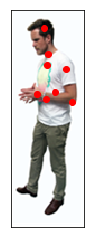

In [6]:
numImages = len(test_dataset.info)

#for imageIdx in range(numImages):
for imageIdx in tqdm(range(numImages)):
    # get image
    img=test_dataset.get_original_image(imageIdx)

    # get image info
    image, joints, is_valid_joints, misc = test_dataset.get_example(imageIdx)
    valid_joints = joints[is_valid_joints].reshape(-1,2)

    bbox=misc['bbox']


    # plot joints
    plt.gcf().clear()
    plt.imshow(img[:,:,::-1])
    # plot joints
    offsetX = bbox[0]
    offsetY = bbox[1]
    W = bbox[2]#-bbox[0]
    H = bbox[3]#-bbox[1]
    print(W,H)
    plt.plot((valid_joints[:,0]+0.5)*W+offsetX, (valid_joints[:,1]+0.5)*H+offsetY,'or')

    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis


    
    
    #
    # let's parse image name
    id = misc['image_id'].split('/')
    #print(id)

    activity = id[-2]
    filename = id[-1]
    filename_no, filename_ext = filename.split('.',1)
    filename_no = int(filename_no)
    filename_no = '{:02d}'.format(filename_no) # add leaning 0 for one digit numbers

    print(activity, filename_no, filename_ext)
    
    
    # save 
    folderName = 'joints/{}'.format(activity)
    if not os.path.exists(folderName):
        os.makedirs(folderName)
    #plt.savefig(folderName+'/'+filename_no+'.'+filename_ext)
    plt.savefig(folderName+'/'+filename_no+'.png')  # jpt is not supported!
    

In [7]:
misc

{'bbox': array([16,  2, 46, 94]),
 'image_id': 'image/resting/standing.relaxed/9.bmp',
 'orig_tightest_bbox': array([23., 16., 32., 66.])}